# Contents
## 1. Sqlite
### 1.1 Creat
### 1.2 Update
### 1.3 Delete
### 1.4 Retrieve
## 2. MongoDB
### 2.1 Creat
### 2.2 Update
### 2.3 Delete
### 2.4 Index
### 2.5 Retrieve
## 3. Combine Sqlite and MongoDB

# 1. Sqlite


In [1]:
import sqlite3

In [2]:
conn=sqlite3.connect('S:\\SQLite\\BEMM459_IoT.db')  
print(type(conn))
cur=conn.cursor()
print(type(cur))

<class 'sqlite3.Connection'>
<class 'sqlite3.Cursor'>


In [3]:
def tables_in_sqlite_db(conn):
    cursor = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [
        v[0] for v in cursor.fetchall()
        if v[0] != "sqlite_sequence"
    ]
    cursor.close()
    return tables

## 1.1 Create and Drop (DDL)

In [4]:
qry='''
CREATE TABLE User (
        user_id       INTEGER     PRIMARY KEY,
        user_name     TEXT(10),
        user_gender   TEXT(1)     NOT NULL,
        user_phone    TEXT(10)    NOT NULL,
        user_email    TEXT(30)    NOT NULL,
        user_dob      DATE,
        user_height   INTEGER,
        user_weight   INTEGER
    );
CREATE TABLE Address (
        address_id         INTEGER     PRIMARY KEY,
        address_city       TEXT(30)    NOT NULL,
        address_postcode   TEXT(10),
        address_detail     TEXT(30),
        user_id            INTEGER     REFERENCES  User (user_id)  ON UPDATE CASCADE ON DELETE CASCADE
    );
CREATE TABLE Brand (
        brand_id         INTEGER     PRIMARY KEY,
        brand_name       TEXT(30)    NOT NULL,
        brand_adress     TEXT(30),
        brand_phone      TEXT(10)    NOT NULL
    );
CREATE TABLE Device (
        device_id      INTEGER       PRIMARY KEY,
        device_type    TEXT(30)      NOT NULL,
        device_model   TEXT(30)      NOT NULL,
        device_name    TEXT(30),
        device_status  INTEGER(1)    NOT NULL,
        user_id        INTEGER       NOT NULL     REFERENCES  User (user_id)      ON UPDATE CASCADE ON DELETE CASCADE,
        address_id      INTEGER       NOT NULL     REFERENCES  Address (address_id)  ON UPDATE CASCADE ON DELETE SET NULL,
        brand_id       INTEGER       NOT NULL     REFERENCES  Brand (brand_id)    ON UPDATE CASCADE ON DELETE SET NULL
    );
CREATE TABLE Device_Address (
        address_id     INTEGER    NOT NULL,
        device_id      INTEGER    NOT NULL,
        adStarttime    DATE       NOT NULL,
        adWorkhours    INTEGER    NOT NULL,
        PRIMARY KEY (address_id, device_id),
        FOREIGN KEY (address_id)    REFERENCES   Address (address_id) 
            ON UPDATE CASCADE ON DELETE CASCADE,
        FOREIGN KEY (device_id)    REFERENCES   Device (device_id) 
            ON UPDATE CASCADE ON DELETE CASCADE
    );
CREATE TABLE wrong_table (
        wrong_id      INTEGER       PRIMARY KEY);
'''
try:
        cur.executescript(qry)
        print ('Tables created successfully')
except:
        print ('Error in creating tables')

Tables created successfully


In [5]:
# Drop the wrong table
qry='''
DROP TABLE wrong_table;
'''
try:
        cur.executescript(qry)
        print ('Table droped successfully')
except:
        print ('Error in droped table')

Table droped successfully


In [6]:
tables = tables_in_sqlite_db(conn)
print(tables)

['User', 'Address', 'Brand', 'Device', 'Device_Address']


In [7]:
# Insert multiple records in table User
qry="insert into User (user_id, user_name, user_gender, user_phone, user_email, user_dob, user_height, user_weight) values (?,?,?,?,?,?,?,?);"
collegelist=[('10001','Zack','M','1234567891','zack@iot.com', '1997-12-03','',    ''  ),
             ('10002','Lisa','F','1234567892','lisa@iot.com', '1995-12-02','1.66','48'),
             ('10003','Ray', '', '1234567893','ray@iot.com',  '',          '1.85','60')]
try:
        cur.executemany(qry, collegelist)
        conn.commit()
        print ('User Records inserted successfully..committed')
except:
        print ('Error in insert operation..rollback')
        conn.rollback()
        
        
        
# Insert multiple records in table Address       
qry="insert into Address (address_id, address_city, address_postcode, address_detail, user_id) values (?,?,?,?,?);"
collegelist=[('20001','Exeter',  'XXX1','adress1','10001'),
             ('20002','Shanghai','XXX2','adress2','10001'),
             ('20003','London',  '',    'adress3','10002'),
             ('20004','NewYork', 'XXX4','adress4','10003')]
try:
        cur.executemany(qry, collegelist)
        conn.commit()
        print ('Address Records inserted successfully..committed')
except:
        print ('Error in insert operation..rollback')
        conn.rollback()
        
        
        
# Insert multiple records in table Brand           
qry="insert into Brand (brand_id, brand_name, brand_adress, brand_phone) values (?,?,?,?);"
collegelist=[('30001','Siemens','brand_adress1','1987654321'),
             ('30002','Dyson',  'brand_adress2','2987654321'),
             ('30003','Apple',  '',             '3987654321'),
             ('30004','Huawei', 'brand_adress4','4987654321')]
try:
        cur.executemany(qry, collegelist)
        conn.commit()
        print ('Brand Records inserted successfully..committed')
except:
        print ('Error in insert operation..rollback')
        conn.rollback()
        
        
        
# Insert multiple records in table Device  
qry="insert into Device (device_id, device_type, device_model, device_name, device_status, user_id, address_id, brand_id) values (?,?,?,?,?,?,?,?);"
collegelist=[('40001','Purifier',    'model2','DysonPurifier',      '1','10001','20001','30002'),
             ('40002','Refrigerator','model2','SiemensRefrigerator','1','10001','20001','30001'),
             ('40003','TV',          'model1','AppleTV',            '0','10001','20001','30003'),
             ('40004','Light',       'model5','',                   '1','10001','20002','30002'),
             ('40005','Homepod',     'model5','Lisa:Homepod',       '1','10002','20003','30003'),
             ('40006','Treadmill',   'model7','Lisa:Treadmill',     '1','10002','20003','30004'),
             ('40007','RobotVaccum', 'model2','',                   '1','10003','20004','30002')]
try:
        cur.executemany(qry, collegelist)
        conn.commit()
        print ('Device Records inserted successfully..committed')
except:
        print ('Error in insert operation..rollback')
        conn.rollback()
        
        
        
# Insert multiple records in table Device_Address          
qry="insert into Device_Address (address_id, device_id, adStarttime, adWorkhours) values (?,?,?,?);"
collegelist=[('20001','40001','2021-01-01','2788'),
             ('20001','40002','2020-02-01','3105'),
             ('20001','40003','2020-09-01','321'),
             ('20002','40004','2019-06-01','3489'),
             ('20003','40005','2020-05-01','4051'),
             ('20003','40006','2021-08-01','592'),
             ('20004','40007','2021-12-01','1707')]
try:
        cur.executemany(qry, collegelist)
        conn.commit()
        print ('Device_Address Records inserted successfully..committed')
except:
        print ('Error in insert operation..rollback')
        conn.rollback()

User Records inserted successfully..committed
Address Records inserted successfully..committed
Brand Records inserted successfully..committed
Device Records inserted successfully..committed
Device_Address Records inserted successfully..committed


## 1.2 Update

In [8]:
# Update the detail address data of address_id 20002 in Address table 

qry='update Address set address_detail="adress02" where address_id=20002'

try:
        cur.execute(qry)
        print ('address_detail  updated')
        conn.commit()
except:
        print ('Error in update operation .. rollback')
        conn.rollback()

address_detail  updated


In [9]:
# Update table based on user input

input_user_id=int(input('Enter user_id of User to update:'))
input_user_name=input('Enter new user_name:')
qry='update User set user_name=? where user_id=?'

try:
        cur.execute(qry, (input_user_name,input_user_id))
        print ('user_name name updated')
        conn.commit()
except:
        print ('Error in update operation .. rollback')
        conn.rollback()
        
# exmaple: user_id=10003, new user_name=Andy

Enter user_id of User to update:10003
Enter new user_name:Andy
user_name name updated


## 1.3 Delete

In [10]:
# Delete the unconnected device

qry='delete from Device where device_status=0'

try:
        cur.execute(qry)
        print ('unconnected device deleted')
        conn.commit()
except:
        print ('Error in delete operation .. rollback')
        conn.rollback()

unconnected device deleted


## 1.4 Retrieve

In [11]:
# Query and display one record from the table User

# Prepare the query String
qry="select * from User;"

# Execute query on SQLite
cur.execute(qry)

# Fetch and display one row
row=cur.fetchone()

print (row)

(10001, 'Zack', 'M', '1234567891', 'zack@iot.com', '1997-12-03', '', '')


In [12]:
# Query and descendingly display devices' workhours based on the address_id user input
# ORDER BY Application

inputAddressID=input ('Enter Address ID:')
qry="select device_id, adWorkhours from Device_Address where address_id=? ORDER BY adWorkhours DESC ";
cur.execute(qry, (inputAddressID,))
row=cur.fetchall()
print (row)

# Example address_id=20001

Enter Address ID:20001
[(40002, 3105), (40001, 2788), (40003, 321)]


In [13]:
# Query and display device type from the table Device based on user input

inputDeviceID=input ('Enter Device ID:')
qry="select device_type from Device where device_id=?";
cur.execute(qry, (inputDeviceID,))
row=cur.fetchall()
print (row)

# Example device_id=40001

Enter Device ID:40001
[('Purifier',)]


In [14]:
# Count each user's deivces and addresses
# COUNT Application 

# Prepare the query String
qry="SELECT user_id, COUNT(device_id), COUNT(address_id) FROM Device GROUP BY user_id;"

# Execute query on SQLite
cur.execute(qry)

# Fetch and display one row
row=cur.fetchall()

print (row)

[(10001, 3, 3), (10002, 2, 2), (10003, 1, 1)]


In [15]:
# Query and display device_type and brand name based on the device_id user input
# JOIN Application 

# Prepare the query String
inputDeviceID=input ('Enter Device ID:')
qry="SELECT device_type, brand_name FROM Brand JOIN Device on Brand.brand_id = Device.brand_id where device_id=?;"

# Execute query on SQLite
cur.execute(qry, (inputDeviceID,))

# Fetch and display one row
row=cur.fetchall()

print (row)

# Example device_id= 40002

Enter Device ID:40002
[('Refrigerator', 'Siemens')]


# 2 Mongodb

In [16]:
import pymongo  

In [17]:
mongoclient = pymongo.MongoClient("mongodb://localhost:2570/")

In [18]:
#Check what databases exist - the output is a list of database names
print(mongoclient.list_database_names())

['admin', 'config', 'local']


## 2.1 CREAT

In [19]:
# Create new MongoDB IoT database
IoTdb = mongoclient["IoTdb"]


In [20]:
# Create a new collection called "Mongo_Devices"
Mongo_Devices  = IoTdb["Mongo_Devices "]
# Add documents  
mylist = [
    {'device_id':40001},
    {'device_id':40002},
    {'device_id':40003},
    {'device_id':40004},
    {'device_id':40005},
    {'device_id':40006},
    {'device_id':40007},
]
Mongo_Devices.insert_many(mylist)


# Query
myresult = Mongo_Devices.find()

#print the result:
for x in myresult:
    print(x)

{'_id': ObjectId('6102b5a0437563fd340238ed'), 'device_id': 40001}
{'_id': ObjectId('6102b5a0437563fd340238ee'), 'device_id': 40002}
{'_id': ObjectId('6102b5a0437563fd340238ef'), 'device_id': 40003}
{'_id': ObjectId('6102b5a0437563fd340238f0'), 'device_id': 40004}
{'_id': ObjectId('6102b5a0437563fd340238f1'), 'device_id': 40005}
{'_id': ObjectId('6102b5a0437563fd340238f2'), 'device_id': 40006}
{'_id': ObjectId('6102b5a0437563fd340238f3'), 'device_id': 40007}


In [21]:
# Create a new collection called "Mongo_Users"
Mongo_Users = IoTdb["Mongo_Users"]
# Add one document
mydict = {'user_id':10001, 
          'Mongo_Devices':[
              {'device_id':40001},
              {'device_id':40002},
              {'device_id':40003},
              {'device_id':40004},
         ]}
Mongo_Users.insert_one(mydict)
# Add many documents
mylist = [
    {'user_id':10002, 
     'Mongo_Devices':[
         {'device_id':40005},
         {'device_id':40006},
     ]},
    {'user_id':10003, 
     'Mongo_Devices':[
         {'device_id':40007}
     ]},
]
Mongo_Users.insert_many(mylist)


# Query
myresult = Mongo_Users.find()

#print the result:
for x in myresult:
    print(x)

{'_id': ObjectId('6102b5a0437563fd340238f4'), 'user_id': 10001, 'Mongo_Devices': [{'device_id': 40001}, {'device_id': 40002}, {'device_id': 40003}, {'device_id': 40004}]}
{'_id': ObjectId('6102b5a0437563fd340238f5'), 'user_id': 10002, 'Mongo_Devices': [{'device_id': 40005}, {'device_id': 40006}]}
{'_id': ObjectId('6102b5a0437563fd340238f6'), 'user_id': 10003, 'Mongo_Devices': [{'device_id': 40007}]}


In [22]:
# Create a new collection called "Measures"
# Take air cleaner for example
Measures = IoTdb["Measures"]
# pm 42 tem 16 hum 29 voc 9 co2 60 level 79
mylist = [
    {'Mongo_Users': 'user_id("10001")',
     'Mongo_Devices': 'device_id("40001")',
     'Timestamp': 'ISODate("2021-07-01T00:00:00Z")',
     'datas':{
         'm1':{
             's1':{'pm25':42, 'tem': 16.5, 'hum':29, 'voc':9, 'co2':60, 'level': 79},
             's2':{'pm25':43, 'tem': 16.4, 'hum':28, 'voc':9, 'co2':62, 'level': 79},
             # ...
             's300':{'pm25':44, 'tem': 16.8, 'hum':29, 'voc':9, 'co2':63, 'level': 80},
         },
         'm2':{
             's1':{'pm25':43, 'tem': 16.7, 'hum':29.6, 'voc':10, 'co2':65, 'level': 79},
             's2':{'pm25':41, 'tem': 16.5, 'hum':29.5, 'voc':2, 'co2':64, 'level': 79},
             # ...
             's300':{'pm25':42, 'tem': 16.4, 'hum':29.4, 'voc':2, 'co2':62, 'level': 79},
         },
         #...
         'm60':{
             's1':{'pm25':44, 'tem': 16.3, 'hum':29.3, 'voc':2, 'co2':65, 'level': 79},
             's2':{'pm25':46, 'tem': 16.2, 'hum':29.8, 'voc':2, 'co2':63, 'level': 79},
             # ...
             's300':{'pm25':45, 'tem': 16.1, 'hum':29.5, 'voc':2, 'co2':60, 'level': 79},
         }}},
    {'Mongo_Users': 'user_id("10001")',
     'Mongo_Devices': 'device_id("40001")',
     'Timestamp': 'ISODate("2021-07-01T01:00:00Z")',
     'datas':{
         'm1':{
             's1':{'pm25':44, 'tem': 16.3, 'hum':29.4, 'voc':2, 'co2':57, 'level': 78},
             's2':{'pm25':44.5, 'tem': 16.5, 'hum':29.9, 'voc':4, 'co2':55, 'level': 79},
             # ...
             's300':{'pm25':43, 'tem': 16.6, 'hum':29.5, 'voc':4, 'co2':58, 'level': 79},
         },
         'm2':{
             's1':{'pm25':43.5, 'tem': 16.5, 'hum':29.9, 'voc':8, 'co2':60, 'level': 79},
             's2':{'pm25':43, 'tem': 16.5, 'hum':30, 'voc':9, 'co2':60, 'level': 79},
             # ...
             's300':{'pm25':42.5, 'tem': 16.8, 'hum':29.6, 'voc':8, 'co2':62, 'level': 79},
         },
         #...
         'm60':{
             's1':{'pm25':42.5, 'tem': 16.6, 'hum':29.3, 'voc':3, 'co2':59, 'level': 79},
             's2':{'pm25':44, 'tem': 16.7, 'hum':29.9, 'voc':3, 'co2':60, 'level': 79},
             # ...
             's300':{'pm25':42, 'tem': 16.6, 'hum':30, 'voc':3, 'co2':60, 'level': 79},
         }}},
    {'Mongo_Users': 'user_id("10001")',
     'Mongo_Devices': 'device_id("40002")',
     'Timestamp': 'ISODate("2021-07-01T00:00:00Z")',
     'datas':'error'}]

Measures.insert_many(mylist)

# Query
myresult = Measures.find()

#print the result:
for x in myresult:
    print(x)

{'_id': ObjectId('6102b5a0437563fd340238f7'), 'Mongo_Users': 'user_id("10001")', 'Mongo_Devices': 'device_id("40001")', 'Timestamp': 'ISODate("2021-07-01T00:00:00Z")', 'datas': {'m1': {'s1': {'pm25': 42, 'tem': 16.5, 'hum': 29, 'voc': 9, 'co2': 60, 'level': 79}, 's2': {'pm25': 43, 'tem': 16.4, 'hum': 28, 'voc': 9, 'co2': 62, 'level': 79}, 's300': {'pm25': 44, 'tem': 16.8, 'hum': 29, 'voc': 9, 'co2': 63, 'level': 80}}, 'm2': {'s1': {'pm25': 43, 'tem': 16.7, 'hum': 29.6, 'voc': 10, 'co2': 65, 'level': 79}, 's2': {'pm25': 41, 'tem': 16.5, 'hum': 29.5, 'voc': 2, 'co2': 64, 'level': 79}, 's300': {'pm25': 42, 'tem': 16.4, 'hum': 29.4, 'voc': 2, 'co2': 62, 'level': 79}}, 'm60': {'s1': {'pm25': 44, 'tem': 16.3, 'hum': 29.3, 'voc': 2, 'co2': 65, 'level': 79}, 's2': {'pm25': 46, 'tem': 16.2, 'hum': 29.8, 'voc': 2, 'co2': 63, 'level': 79}, 's300': {'pm25': 45, 'tem': 16.1, 'hum': 29.5, 'voc': 2, 'co2': 60, 'level': 79}}}}
{'_id': ObjectId('6102b5a0437563fd340238f8'), 'Mongo_Users': 'user_id("1000

## 2.2 Update

In [23]:
# Update one Measures documents

myquery = {'Mongo_Users': 'user_id("10001")',
           'Mongo_Devices': 'device_id("40001")',
           'Timestamp': 'ISODate("2021-07-01T01:00:00Z")'}
newvalues = { "$set": { "datas.m1.s2": {'pm25':42, 'tem': 16.5, 'hum':29.8, 'voc':9, 'co2':60, 'level': 79} } }

Measures.update_one(myquery, newvalues)

#print documents in the collection after the update:
list(Measures.find())

[{'_id': ObjectId('6102b5a0437563fd340238f7'),
  'Mongo_Users': 'user_id("10001")',
  'Mongo_Devices': 'device_id("40001")',
  'Timestamp': 'ISODate("2021-07-01T00:00:00Z")',
  'datas': {'m1': {'s1': {'pm25': 42,
     'tem': 16.5,
     'hum': 29,
     'voc': 9,
     'co2': 60,
     'level': 79},
    's2': {'pm25': 43,
     'tem': 16.4,
     'hum': 28,
     'voc': 9,
     'co2': 62,
     'level': 79},
    's300': {'pm25': 44,
     'tem': 16.8,
     'hum': 29,
     'voc': 9,
     'co2': 63,
     'level': 80}},
   'm2': {'s1': {'pm25': 43,
     'tem': 16.7,
     'hum': 29.6,
     'voc': 10,
     'co2': 65,
     'level': 79},
    's2': {'pm25': 41,
     'tem': 16.5,
     'hum': 29.5,
     'voc': 2,
     'co2': 64,
     'level': 79},
    's300': {'pm25': 42,
     'tem': 16.4,
     'hum': 29.4,
     'voc': 2,
     'co2': 62,
     'level': 79}},
   'm60': {'s1': {'pm25': 44,
     'tem': 16.3,
     'hum': 29.3,
     'voc': 2,
     'co2': 65,
     'level': 79},
    's2': {'pm25': 46,
     'tem'

In [24]:
#Update Many - This query will update the first records of 2 documents to the same

myquery = {'Mongo_Users': 'user_id("10001")',
           'Mongo_Devices': 'device_id("40001")'}
newvalues = { "$set": { "datas.m1.s1": {'pm25':42, 'tem': 16.5, 'hum':29, 'voc':9, 'co2':60, 'level': 79} } }


x = Measures.update_many(myquery, newvalues)

print(x.modified_count, "documents updated.")


1 documents updated.


## 2.3 Delete

In [25]:
# Delete the error data in the Measure collection
myquery = { "datas": "error"}
x = Measures.delete_many(myquery)
print(x.deleted_count, " documents deleted.")


1  documents deleted.


## 2.4 Index

In [26]:
# Analyze query Performance
IoTdb.Measures.find({'Mongo_Devices': 'device_id("40001")'}).explain()
# {'executionStages': 'stage': 'COLLSCAN'} means global index and not using the index we defined

{'queryPlanner': {'plannerVersion': 1,
  'namespace': 'IoTdb.Measures',
  'indexFilterSet': False,
  'parsedQuery': {'Mongo_Devices': {'$eq': 'device_id("40001")'}},
  'winningPlan': {'stage': 'COLLSCAN',
   'filter': {'Mongo_Devices': {'$eq': 'device_id("40001")'}},
   'direction': 'forward'},
  'rejectedPlans': []},
 'executionStats': {'executionSuccess': True,
  'nReturned': 2,
  'executionTimeMillis': 0,
  'totalKeysExamined': 0,
  'totalDocsExamined': 2,
  'executionStages': {'stage': 'COLLSCAN',
   'filter': {'Mongo_Devices': {'$eq': 'device_id("40001")'}},
   'nReturned': 2,
   'executionTimeMillisEstimate': 0,
   'works': 4,
   'advanced': 2,
   'needTime': 1,
   'needYield': 0,
   'saveState': 0,
   'restoreState': 0,
   'isEOF': 1,
   'direction': 'forward',
   'docsExamined': 2},
  'allPlansExecution': []},
 'serverInfo': {'host': 'wvd1uebs1-1',
  'port': 2570,
  'version': '4.4.1',
  'gitVersion': 'ad91a93a5a31e175f5cbf8c69561e788bbc55ce1'},
 'ok': 1.0}

In [27]:
# create an index
Measures.create_index([("Mongo_Devices", pymongo.ASCENDING), ("Timestamp", pymongo.DESCENDING)], background=True)

'Mongo_Devices_1_Timestamp_-1'

In [28]:
# Analyze query Performance again
IoTdb.Measures.find({'Mongo_Devices': 'device_id("40001")'}).explain()
# 'FETCH' means the query use the index we defined, So, the Query efficiency is improved

{'queryPlanner': {'plannerVersion': 1,
  'namespace': 'IoTdb.Measures',
  'indexFilterSet': False,
  'parsedQuery': {'Mongo_Devices': {'$eq': 'device_id("40001")'}},
  'winningPlan': {'stage': 'FETCH',
   'inputStage': {'stage': 'IXSCAN',
    'keyPattern': {'Mongo_Devices': 1, 'Timestamp': -1},
    'indexName': 'Mongo_Devices_1_Timestamp_-1',
    'isMultiKey': False,
    'multiKeyPaths': {'Mongo_Devices': [], 'Timestamp': []},
    'isUnique': False,
    'isSparse': False,
    'isPartial': False,
    'indexVersion': 2,
    'direction': 'forward',
    'indexBounds': {'Mongo_Devices': ['["device_id("40001")", "device_id("40001")"]'],
     'Timestamp': ['[MaxKey, MinKey]']}}},
  'rejectedPlans': []},
 'executionStats': {'executionSuccess': True,
  'nReturned': 2,
  'executionTimeMillis': 34,
  'totalKeysExamined': 2,
  'totalDocsExamined': 2,
  'executionStages': {'stage': 'FETCH',
   'nReturned': 2,
   'executionTimeMillisEstimate': 33,
   'works': 3,
   'advanced': 2,
   'needTime': 0,
 

In [29]:
# query exist index

indexlist=Measures.list_indexes()
for index in indexlist:
    print(index)
# '_id' is indexed by default, '1' means ASCENDING 

SON([('v', 2), ('key', SON([('_id', 1)])), ('name', '_id_')])
SON([('v', 2), ('key', SON([('Mongo_Devices', 1), ('Timestamp', -1)])), ('name', 'Mongo_Devices_1_Timestamp_-1'), ('background', True)])


## 2.5 Retrieve

In [30]:
# Query the collected data from device-40001 at 2021-07-01T01:00:00Z
myresult=IoTdb.Measures.find({'Mongo_Devices': 'device_id("40001")',
                              'Timestamp': 'ISODate("2021-07-01T01:00:00Z")'},
                             {'Mongo_Users':0,'Mongo_Devices':0,'Timestamp':0})
for x in myresult:
    print(x)

{'_id': ObjectId('6102b5a0437563fd340238f8'), 'datas': {'m1': {'s1': {'pm25': 42, 'tem': 16.5, 'hum': 29, 'voc': 9, 'co2': 60, 'level': 79}, 's2': {'pm25': 42, 'tem': 16.5, 'hum': 29.8, 'voc': 9, 'co2': 60, 'level': 79}, 's300': {'pm25': 43, 'tem': 16.6, 'hum': 29.5, 'voc': 4, 'co2': 58, 'level': 79}}, 'm2': {'s1': {'pm25': 43.5, 'tem': 16.5, 'hum': 29.9, 'voc': 8, 'co2': 60, 'level': 79}, 's2': {'pm25': 43, 'tem': 16.5, 'hum': 30, 'voc': 9, 'co2': 60, 'level': 79}, 's300': {'pm25': 42.5, 'tem': 16.8, 'hum': 29.6, 'voc': 8, 'co2': 62, 'level': 79}}, 'm60': {'s1': {'pm25': 42.5, 'tem': 16.6, 'hum': 29.3, 'voc': 3, 'co2': 59, 'level': 79}, 's2': {'pm25': 44, 'tem': 16.7, 'hum': 29.9, 'voc': 3, 'co2': 60, 'level': 79}, 's300': {'pm25': 42, 'tem': 16.6, 'hum': 30, 'voc': 3, 'co2': 60, 'level': 79}}}}


In [31]:
myresult=IoTdb.Measures.find({},{'Mongo_Devices': 'device_id("40001")'})
for x in myresult:
    print(x)

{'_id': ObjectId('6102b5a0437563fd340238f7'), 'Mongo_Devices': 'device_id("40001")'}
{'_id': ObjectId('6102b5a0437563fd340238f8'), 'Mongo_Devices': 'device_id("40001")'}


In [32]:
# Query the information of user-10002
myresult=IoTdb.Mongo_Users.find({'user_id':10002})
for x in myresult:
    print(x)

{'_id': ObjectId('6102b5a0437563fd340238f5'), 'user_id': 10002, 'Mongo_Devices': [{'device_id': 40005}, {'device_id': 40006}]}


In [33]:
# statistical query count how many records from user 10001
IoTdb.Measures.count({'Mongo_Users': 'user_id("10001")'})

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


2

In [34]:
# statistical query how many device each user has
myresult = IoTdb.Mongo_Users.aggregate([{ '$project': {'user_id':1,'_id':0,'device_count': {'$size': "$Mongo_Devices"}}}])
for x in myresult:
    print(x)

{'user_id': 10001, 'device_count': 4}
{'user_id': 10002, 'device_count': 2}
{'user_id': 10003, 'device_count': 1}


In [35]:
# query the Embedded document
myresult=IoTdb.Measures.aggregate(
    [{"$match": {'Mongo_Devices': 'device_id("40001")','Timestamp': 'ISODate("2021-07-01T01:00:00Z")'}},
     {"$project": {"datas": '$datas' ,"_id": 0}}
    ])
for x in myresult:
    print(x)
print(type(myresult))

{'datas': {'m1': {'s1': {'pm25': 42, 'tem': 16.5, 'hum': 29, 'voc': 9, 'co2': 60, 'level': 79}, 's2': {'pm25': 42, 'tem': 16.5, 'hum': 29.8, 'voc': 9, 'co2': 60, 'level': 79}, 's300': {'pm25': 43, 'tem': 16.6, 'hum': 29.5, 'voc': 4, 'co2': 58, 'level': 79}}, 'm2': {'s1': {'pm25': 43.5, 'tem': 16.5, 'hum': 29.9, 'voc': 8, 'co2': 60, 'level': 79}, 's2': {'pm25': 43, 'tem': 16.5, 'hum': 30, 'voc': 9, 'co2': 60, 'level': 79}, 's300': {'pm25': 42.5, 'tem': 16.8, 'hum': 29.6, 'voc': 8, 'co2': 62, 'level': 79}}, 'm60': {'s1': {'pm25': 42.5, 'tem': 16.6, 'hum': 29.3, 'voc': 3, 'co2': 59, 'level': 79}, 's2': {'pm25': 44, 'tem': 16.7, 'hum': 29.9, 'voc': 3, 'co2': 60, 'level': 79}, 's300': {'pm25': 42, 'tem': 16.6, 'hum': 30, 'voc': 3, 'co2': 60, 'level': 79}}}}
<class 'pymongo.command_cursor.CommandCursor'>


## 3. Combine Sqlite and MongoDB

In [36]:
import pandas as pd
import seaborn as sns

### 3.1 Manage the indoor environment quality of the 20001 address of 10001 user

In [37]:
# find the Purifier device_id of address 20001 in Sqlite
# Prepare the query String
qry="SELECT device_id FROM Device where address_id=20001 and device_type='Purifier';"

# Execute query on SQLite
cur.execute(qry)

# Fetch and display one row
row=cur.fetchall()

print (row)

[(40001,)]


In [38]:
# Query the device_id 40001(Purifier)  data 
# from 2021-07-01T00:00:00Z to 2021-07-01T01:00:00Z in Mongodb
myresult=IoTdb.Measures.aggregate(
    [{"$match": {'Mongo_Devices': 'device_id("40001")',}},
     {"$project": {"datas": '$datas',"_id": 0,'Timestamp':1}} 
    ])

In [39]:
# Converting cursor to the list of dictionaries
list_cur = list(myresult)
# Query the latest environment quality data
latest_data= list_cur[1]['datas']['m60']['s300']
latest_data


{'pm25': 45, 'tem': 16.1, 'hum': 29.5, 'voc': 2, 'co2': 60, 'level': 79}

In [40]:
# Design a program to react on different environmental quality data
def ReactProgram(data):
    if data['pm25']>37.5:
        print('Enable the PM2.5 filter function')
    else:
        print('Indoor PM2.5 concentration is normal')
    if data['tem']<23:
        print('Enable the heating function')
    elif data['tem']<28:
        print('Indoor temperature is comfortable')
    else:
        print('Enable the cooling  function')        
    if data['hum']<30:
        print('Enable the humidifier function')
    elif data['hum']<60:
        print('Indoor Humidity is normal')
    else:
        print('Enable the dehumidification function')
    if data['co2']>80:
        print('Remind users of ventilation')
    else:
        print('Indoor co2 concentration is normal')
    return

In [41]:
# Apply the ReactProgram
ReactProgram(latest_data)

Enable the PM2.5 filter function
Enable the heating function
Enable the humidifier function
Indoor co2 concentration is normal


### 3.2 Generate environmental quality reports for users

### 3.2.1 Draw a line chart of air environment changes by the data of Purifier

In [42]:
# Convert Query data to Dataframe and analyze the Dataframe
dict_cur1 = list_cur[0]['datas']
dict_cur2 = list_cur[1]['datas']
a = [] 
for t in dict_cur1: 
    a.append(pd.DataFrame.from_dict(dict_cur1[t]))
for t in dict_cur2: 
    a.append(pd.DataFrame.from_dict(dict_cur2[t])) 

result1 = pd.concat(a, axis=1)
result1.columns = range(1, 19)
result1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
pm25,42.0,42.0,43.0,43.5,43.0,42.5,42.5,44.0,42.0,42.0,43.0,44.0,43.0,41.0,42.0,44.0,46.0,45.0
tem,16.5,16.5,16.6,16.5,16.5,16.8,16.6,16.7,16.6,16.5,16.4,16.8,16.7,16.5,16.4,16.3,16.2,16.1
hum,29.0,29.8,29.5,29.9,30.0,29.6,29.3,29.9,30.0,29.0,28.0,29.0,29.6,29.5,29.4,29.3,29.8,29.5
voc,9.0,9.0,4.0,8.0,9.0,8.0,3.0,3.0,3.0,9.0,9.0,9.0,10.0,2.0,2.0,2.0,2.0,2.0
co2,60.0,60.0,58.0,60.0,60.0,62.0,59.0,60.0,60.0,60.0,62.0,63.0,65.0,64.0,62.0,65.0,63.0,60.0
level,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,80.0,79.0,79.0,79.0,79.0,79.0,79.0


In [43]:
result2 = result1.T
result2

,pm25,tem,hum,voc,co2,level
1,42.0,16.5,29.0,9.0,60.0,79.0
2,42.0,16.5,29.8,9.0,60.0,79.0
3,43.0,16.6,29.5,4.0,58.0,79.0
4,43.5,16.5,29.9,8.0,60.0,79.0
5,43.0,16.5,30.0,9.0,60.0,79.0
6,42.5,16.8,29.6,8.0,62.0,79.0
7,42.5,16.6,29.3,3.0,59.0,79.0
8,44.0,16.7,29.9,3.0,60.0,79.0
9,42.0,16.6,30.0,3.0,60.0,79.0
10,42.0,16.5,29.0,9.0,60.0,79.0


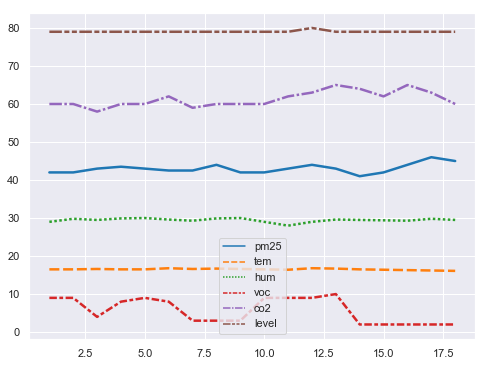

In [44]:
#  Draw a line chart of air environment changes by the data of Purifier
sns.set_style(style="whitegrid")
sns.set(rc={"figure.figsize":(8, 6)})
sns.lineplot(data=result2, palette="tab10", linewidth=2.5)


### 3.2.2 Find the detial information and average air quality (from 2021-07-01 00:00 to 01:00)  of 40001 device

In [45]:
# find the address information of 40001 device
# Prepare the query String
qry='''SELECT Address.user_id, Address.address_id, address_city, device_id 
       FROM Address JOIN Device on Address.address_id = Device.address_id 
       where device_id=40001;'''

# Execute query on SQLite
cur.execute(qry)

# Fetch and display one row
row=cur.fetchall()

print (row)

[(10001, 20001, 'Exeter', 40001)]


In [46]:
data = pd.DataFrame(row)
data.columns = ['user_id', 'address_id', 'address_city', 'device_id']
data

,user_id,address_id,address_city,device_id
0,10001,20001,Exeter,40001


In [47]:
# Calculate the average value of each indicator, and insert the value to the final dataframe
data['avg_pm25'] = result2['pm25'].mean()
data['avg_hum'] = result2['hum'].mean()
data['avg_voc'] = result2['voc'].mean()
data['avg_co2'] = result2['co2'].mean()
data['avg_level'] = result2['level'].mean()
data

,user_id,address_id,address_city,device_id,avg_pm25,avg_hum,avg_voc,avg_co2,avg_level
0,10001,20001,Exeter,40001,43.027778,29.45,5.722222,61.277778,79.055556


### Drop all databases

In [48]:
# Delete Sqlite database
qry='''
DROP TABLE User;
DROP TABLE Address;
DROP TABLE Brand;
DROP TABLE Device;
DROP TABLE Device_Address;
'''
try:
        cur.executescript(qry)
        print ('Table droped successfully')
except:
        print ('Error in droped table')

Table droped successfully


In [49]:
# drop MongoDB database
mongoclient.drop_database("IoTdb")